# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [149]:
# Nombres de columnas
column_names = ["age", "sex", "cp", "trestbps", "chol",
                "fbs", "restecg", "thalach", "exang", "oldpeak",
                "slope", "ca", "thal", "target"]

# Marcador de posición de NAs
na_values = [-9]

# Leemos el dataset
file_path = "processed.cleveland.data"
dataset = pd.read_csv(file_path, header=None, names=column_names, encoding='latin-1', na_values=na_values)

dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [150]:
dataset.shape

(303, 14)

In [151]:
#A estas columnas tenemos que hacerle algún tipo de imputación
cols_con_na = [col for col in dataset.columns if(dataset[col].isnull().mean()>0)]
cols_con_na
#Observamos que no hay ninguna columna con valores faltantes

[]

In [152]:
# necesitamos conocer el tipo de datos de cada columna
dataset.dtypes
#Tenemos cierta seguridad con los datos float64 e int64
#el tipo object puede ser problematico porque acepta string, necesitamos que todos sean numeros.

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [153]:
for col in ['ca','thal','target']:
     value_counts = dataset[col].value_counts()
     print(value_counts)
#necesitamos imputar los valores faltantes expresados como ?
#Utilizaremos la imputacion por moda ya que estos valores originalmente eran categoricos
#No queremos eliminar filas por la poca cantidad de valores que hay.

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64


In [154]:
for col in ['ca','thal']:
     value_counts = dataset[col].value_counts()
     max_count_value = value_counts.idxmax()
     print(f"La moda de la columna '{col}' es:", max_count_value)
     replacement_value = max_count_value
     value_to_replace = '?' 
     dataset[col] = dataset[col].replace(value_to_replace, replacement_value)
     value_counts = dataset[col].value_counts()
     print(value_counts)
#Ya tenemos todas nuestras columnas con variables codificadas correctamente

La moda de la columna 'ca' es: 0.0
0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
La moda de la columna 'thal' es: 3.0
3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64


## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [155]:
# dividimos las columnas del dataset en variables independientes (x) y dependientes (y)
X = dataset[["age", "sex", "cp", "trestbps", "chol","fbs", "restecg", "thalach", "exang",
             "oldpeak","slope", "ca", "thal"]]
y = dataset[["target"]]

#Convertimos al tipo float para asegurar que los tipo object no interfieran
X = X.astype('float64')
#Realizamos la codificacion de las categorias del target al tipo one hot encoding
y_encoded = kr.utils.to_categorical(y)
# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.20,shuffle=True, random_state=2023)

In [156]:
#Inicializamos el modelo
model = kr.models.Sequential()
#Agregramos la primera capa oculta, una capa densa
model.add(kr.layers.Dense(input_dim=13,units=26,activation='relu'))

#Segunda capa oculta
model.add(kr.layers.Dense(units=10,activation='relu'))

#Capa de salida
model.add(kr.layers.Dense(units=5, activation='softmax'))


In [157]:
#Compilamos el modelo
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Ajustamos el modelo
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
8/8 [==============================] - 4s 3ms/step - loss: 21.0043 - accuracy: 0.1364
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 13.7555 - accuracy: 0.4008
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 10.9672 - accuracy: 0.5248
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 9.4083 - accuracy: 0.5289
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 8.0669 - accuracy: 0.5289
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 6.9283 - accuracy: 0.5331
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 5.9141 - accuracy: 0.5289
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 5.1857 - accuracy: 0.5248
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 4.5760 - accuracy: 0.5331
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 4.0552 - accuracy: 0.5413
Epoch 11/50
8/8 [===================

In [158]:
#Evaluamos el modelo
loss,accuracy = model.evaluate(X_test,y_test)
print(f'{loss = },{accuracy = }')

2/2 [==============================] - 0s 4ms/step - loss: 1.4480 - accuracy: 0.4918
loss = 1.4479564428329468,accuracy = 0.49180328845977783


#### Descripcion

Construimos una red neuronal primero creando una capa densa con ingreso de las 13 variables independientes, 26 neuronas debido a que pense que seria buena idea tener el doble de neuronas de las variables de entrada y la funcion de activacion ReLU que es buena para este tipo de clasificacion multiclase.

Se agrego una segunda capa con 10 unidades de neuronas y la misma funcion de activacion.
Se agrego la capa de salida con 3 neuronas ya que es el numero de clases que tiene el target y funcion de activacion softmax que es una funcion sigmoide adecuada para clasificacion multiclase.

Se obtuvo un resultado muy pobre con un accuracy de 0.5410, con mucho rango de mejora.

## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [191]:
rango_capas = range(1, 11)
step = 1

# Ciclo
capas_results = []
for capas in rango_capas:
    # Creamos un modelo secuencial
    model = kr.models.Sequential()
    
    # Primera capa oculta
    model.add(kr.layers.Dense(input_dim=13, units=26, activation='relu'))
    
    # Capas ocultas
    for _ in range(capas):
        model.add(kr.layers.Dense(units=7, activation='relu'))
    
    # Capa de salida
    model.add(kr.layers.Dense(units=5, activation='softmax'))
    
    # Compilamos
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Guardamos el accuracy de este modelo
    capas_accuracy = history.history['accuracy'][-1]
    capas_loss = history.history['loss'][-1]
    capas_results.append((capas, capas_accuracy,capas_loss))

# Resultados
for capas, capas_accuracy, capas_loss in capas_results:
    print(f"Capas ocultas: {capas}, Accuracy: {capas_accuracy:.4f}, Loss: {capas_loss:.4f}")

Capas ocultas: 1, Accuracy: 0.5207, Loss: 1.4646
Capas ocultas: 2, Accuracy: 0.5124, Loss: 1.4407
Capas ocultas: 3, Accuracy: 0.5165, Loss: 1.3791
Capas ocultas: 4, Accuracy: 0.5165, Loss: 1.1861
Capas ocultas: 5, Accuracy: 0.5165, Loss: 1.2840
Capas ocultas: 6, Accuracy: 0.5413, Loss: 1.1020
Capas ocultas: 7, Accuracy: 0.5248, Loss: 1.1198
Capas ocultas: 8, Accuracy: 0.5744, Loss: 1.0398
Capas ocultas: 9, Accuracy: 0.5248, Loss: 1.1003
Capas ocultas: 10, Accuracy: 0.5413, Loss: 1.0893


### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [193]:

rango_neuronas = np.trunc(np.logspace(np.log10(10), np.log10(1000), num=10))

# Ciclo
neuronas_results = []
for neuronas in rango_neuronas:
    # Creamos un modelo secuencial
    model = kr.models.Sequential()
    
    # Primera capa oculta
    model.add(kr.layers.Dense(input_dim=13, units=neuronas, activation='relu'))
    
    # Segunda capa oculta
    model.add(kr.layers.Dense(units=10, activation='relu'))
    
    # Capa de salida
    model.add(kr.layers.Dense(units=5, activation='softmax'))
    
    # Compilacion
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Guardamos el accuracy de este modelo
    neuronas_accuracy = history.history['accuracy'][-1]
    neuronas_loss = history.history['loss'][-1]
    neuronas_results.append((neuronas, neuronas_accuracy,neuronas_loss))


# Display the results
for neuronas, neuronas_accuracy, neuronas_loss in neuronas_results:
    print(f"Neuronas en capa inicial: {neuronas}, Accuracy: {neuronas_accuracy:.4f}, Loss: {neuronas_loss:.4f}")

Neuronas en capa inicial: 10.0, Accuracy: 0.4959, Loss: 1.4678
Neuronas en capa inicial: 16.0, Accuracy: 0.4959, Loss: 1.5227
Neuronas en capa inicial: 27.0, Accuracy: 0.5083, Loss: 1.2295
Neuronas en capa inicial: 46.0, Accuracy: 0.5909, Loss: 1.0940
Neuronas en capa inicial: 77.0, Accuracy: 0.5661, Loss: 1.0556
Neuronas en capa inicial: 129.0, Accuracy: 0.5413, Loss: 1.1353
Neuronas en capa inicial: 215.0, Accuracy: 0.5165, Loss: 1.4506
Neuronas en capa inicial: 359.0, Accuracy: 0.5868, Loss: 1.0121
Neuronas en capa inicial: 599.0, Accuracy: 0.5620, Loss: 0.9795
Neuronas en capa inicial: 1000.0, Accuracy: 0.5165, Loss: 1.4474


### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [194]:
rango_epocas = np.logspace(np.log10(10), np.log10(5000), num=10).astype(int)

# Ciclo
epocas_results = []
for epocas in rango_epocas:
    # Creamos un modelo secuencial
    model = kr.models.Sequential()
    
    # Primera capa oculta
    model.add(kr.layers.Dense(input_dim=13, units=26, activation='relu'))
    
    # Segunda capa oculta
    model.add(kr.layers.Dense(units=10, activation='relu'))
    
    # Capa de salida
    model.add(kr.layers.Dense(units=5, activation='softmax'))
    
    # Compilacion
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, verbose=0)
    
    # Guardamos el accuracy de este modelo
    epocas_accuracy = history.history['accuracy'][-1]
    epocas_loss = history.history['loss'][-1]
    epocas_results.append((epocas, epocas_accuracy,epocas_loss))


# Display the results
for epocas, epocas_accuracy, epocas_loss in epocas_results:
    print(f"Epocas: {epocas}, Accuracy: {epocas_accuracy:.4f}, Loss: {epocas_loss:.4f}")

Epocas: 10, Accuracy: 0.1777, Loss: 2.8910
Epocas: 19, Accuracy: 0.5000, Loss: 2.0108
Epocas: 39, Accuracy: 0.5083, Loss: 1.2886
Epocas: 79, Accuracy: 0.5702, Loss: 1.0510
Epocas: 158, Accuracy: 0.6157, Loss: 0.9709
Epocas: 315, Accuracy: 0.5496, Loss: 1.0707
Epocas: 629, Accuracy: 0.6322, Loss: 0.8711
Epocas: 1256, Accuracy: 0.5165, Loss: 1.3061
Epocas: 2506, Accuracy: 0.7025, Loss: 0.6676
Epocas: 4999, Accuracy: 0.7645, Loss: 0.5622


## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [195]:
rango_batch = np.logspace(np.log10(1), np.log10(dataset.shape[0]), num=10).astype(int)

# Ciclo
batch_results = []
for batch in rango_batch:
    # Creamos un modelo secuencial
    model = kr.models.Sequential()
    
    # Primera capa oculta
    model.add(kr.layers.Dense(input_dim=13, units=26, activation='relu'))
    
    # Segunda capa oculta
    model.add(kr.layers.Dense(units=10, activation='relu'))
    
    # Capa de salida
    model.add(kr.layers.Dense(units=5, activation='softmax'))
    
    # Compilacion
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenamiento del modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=batch, verbose=0)
    
    # Guardamos el accuracy de este modelo
    batch_accuracy = history.history['accuracy'][-1]
    batch_loss = history.history['loss'][-1]
    batch_results.append((batch, batch_accuracy,batch_loss))


# Resultados
for batch, batch_accuracy,batch_loss in batch_results:
    print(f"Epocas: {batch}, Accuracy: {batch_accuracy:.4f}, Loss: {batch_loss:.4f}")

Epocas: 1, Accuracy: 0.5826, Loss: 1.0168
Epocas: 1, Accuracy: 0.5909, Loss: 1.0162
Epocas: 3, Accuracy: 0.5744, Loss: 1.1075
Epocas: 6, Accuracy: 0.5661, Loss: 1.1202
Epocas: 12, Accuracy: 0.5455, Loss: 1.1542
Epocas: 23, Accuracy: 0.5579, Loss: 1.2173
Epocas: 45, Accuracy: 0.5620, Loss: 1.1960
Epocas: 85, Accuracy: 0.5248, Loss: 1.3178
Epocas: 160, Accuracy: 0.3843, Loss: 1.8817
Epocas: 302, Accuracy: 0.1901, Loss: 6.6558


## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

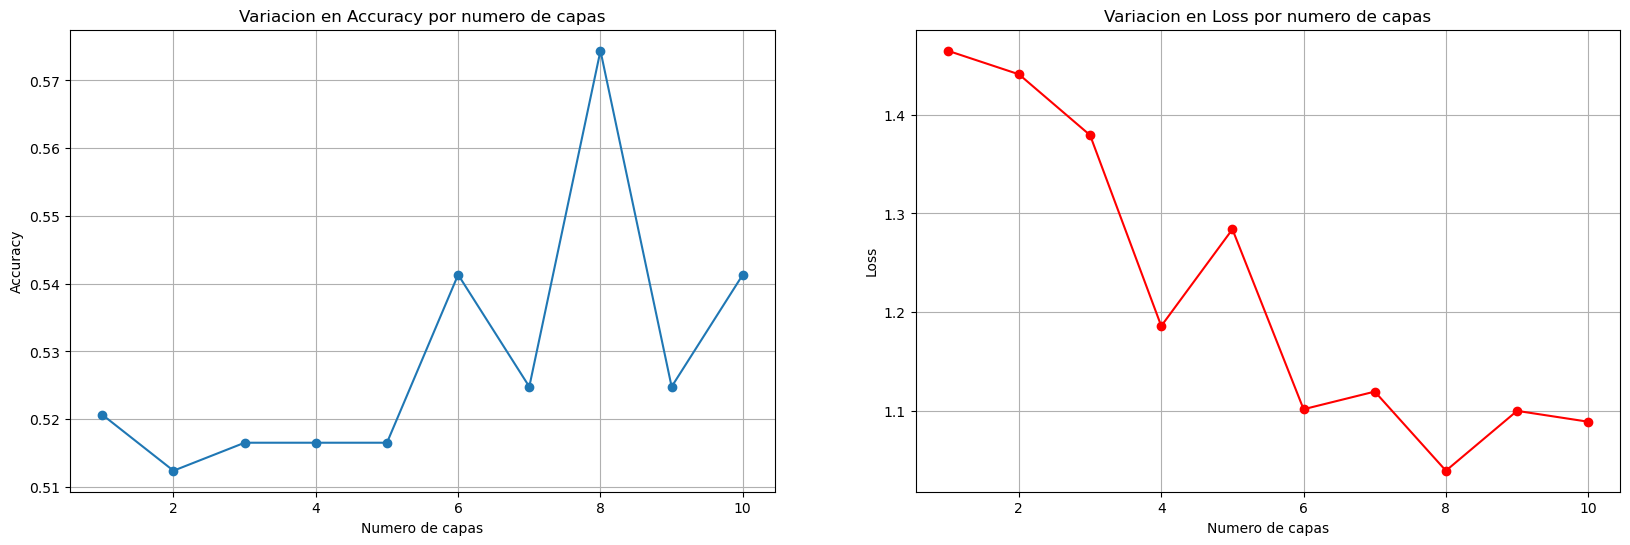

In [200]:
# Extraemos los valores para graficar
capas_values = [result[0] for result in capas_results]
capas_accuracy_values = [result[1] for result in capas_results]
capas_loss_values = [result[2] for result in capas_results]

# Graficamos

fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(capas_values, capas_accuracy_values, marker='o')
plt.xlabel('Numero de capas')
plt.ylabel('Accuracy')
plt.title('Variacion en Accuracy por numero de capas')
plt.grid(True)

# Create the loss graph
plt.subplot(1,2,2)
plt.plot(capas_values, capas_loss_values, marker='o', color='r')
plt.xlabel('Numero de capas')
plt.ylabel('Loss')
plt.title('Variacion en Loss por numero de capas')
plt.grid(True)
plt.show()

In [ ]:
### No hay una tendencia clara para aumentar el accuracy aumentando en numero de capas, al parecer para mi modelo, 8 capas serian lo ideal

### Mi numero de capas lo defini en 2 por ser un numero razonable, sin ningun respaldo directo.

### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

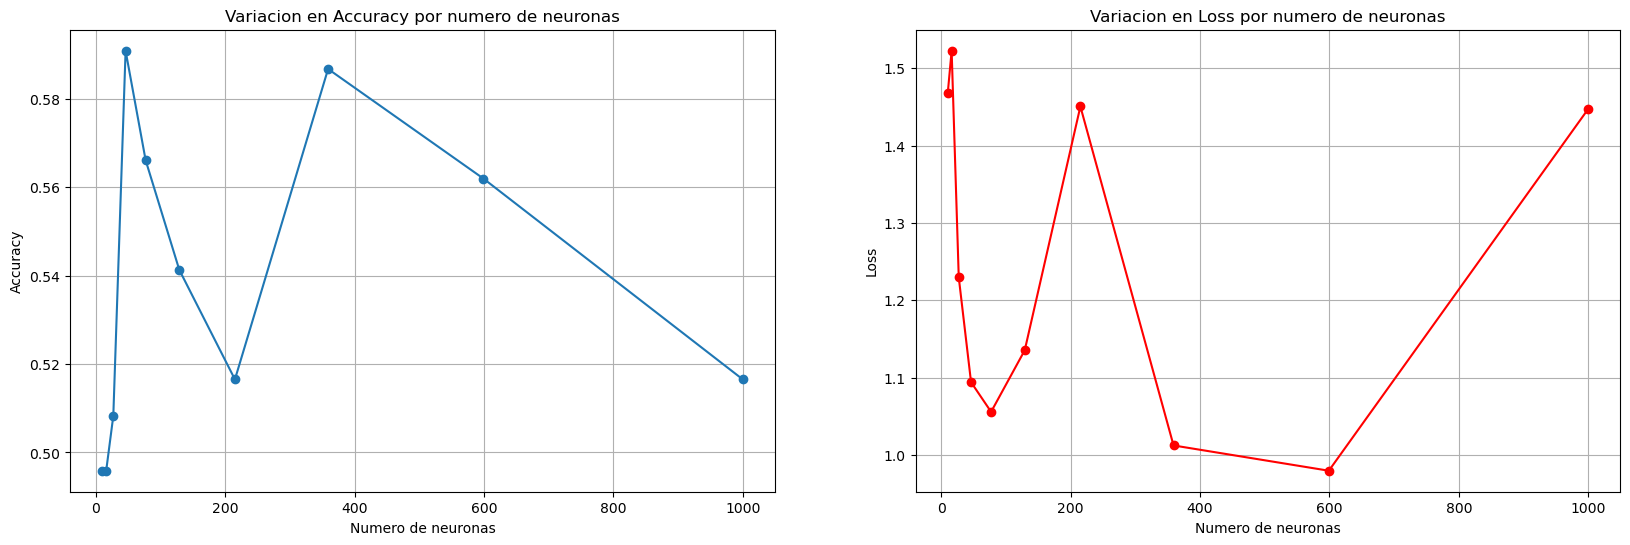

In [202]:
# Extraemos los valores para graficar
neuronas_values = [result[0] for result in neuronas_results]
neuronas_accuracy_values = [result[1] for result in neuronas_results]
neuronas_loss_values = [result[2] for result in neuronas_results]

# Graficamos

fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(neuronas_values, neuronas_accuracy_values, marker='o')
plt.xlabel('Numero de neuronas')
plt.ylabel('Accuracy')
plt.title('Variacion en Accuracy por numero de neuronas')
plt.grid(True)

# Create the loss graph
plt.subplot(1,2,2)
plt.plot(neuronas_values, neuronas_loss_values, marker='o', color='r')
plt.xlabel('Numero de neuronas')
plt.ylabel('Loss')
plt.title('Variacion en Loss por numero de neuronas')
plt.grid(True)
plt.show()

In [ ]:
### No hay una tendencia clara para aumentar el accuracy aumentando en numero de neuronas, al parecer para mi modelo, aprox 10 neuronas serian lo ideal

### Cosideras necesario cambiar la cantidad de neuronas para el ejercicio sobre variabilidad en capas ocultas?
### Si quizas cambiar neuronas por cada capa.

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

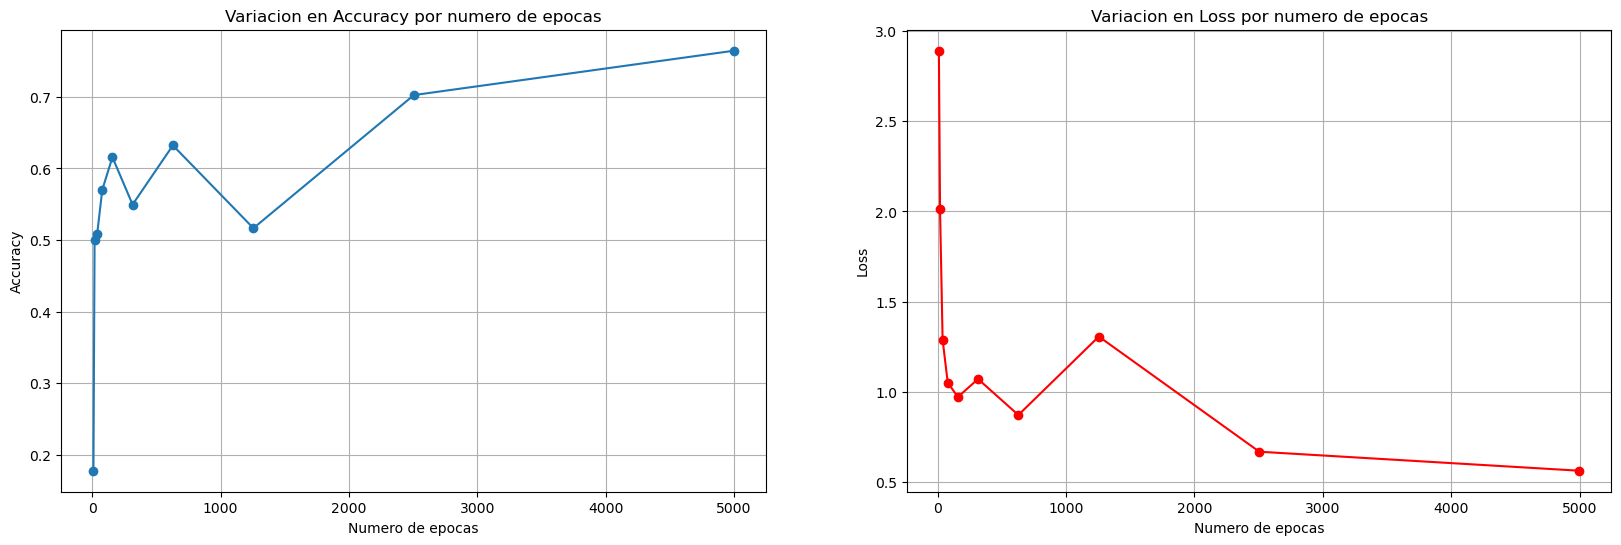

In [203]:
# Extraemos los valores para graficar
epocas_values = [result[0] for result in epocas_results]
epocas_accuracy_values = [result[1] for result in epocas_results]
epocas_loss_values = [result[2] for result in epocas_results]

# Graficamos

fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(epocas_values, epocas_accuracy_values, marker='o')
plt.xlabel('Numero de epocas')
plt.ylabel('Accuracy')
plt.title('Variacion en Accuracy por numero de epocas')
plt.grid(True)

# Create the loss graph
plt.subplot(1,2,2)
plt.plot(epocas_values, epocas_loss_values, marker='o', color='r')
plt.xlabel('Numero de epocas')
plt.ylabel('Loss')
plt.title('Variacion en Loss por numero de epocas')
plt.grid(True)
plt.show()

In [ ]:
### Al parecer tanto el accuracy como el loss aumentan y disminuyen, respectivamente, con aumentar el numero de epocas
### Pero esto puede ser contraproducente porque este ejercicio fue el que mas consumio tiempo
### a mayor numero de epocas mayor accuracy pero mayor capacidad computacional necesitara

### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

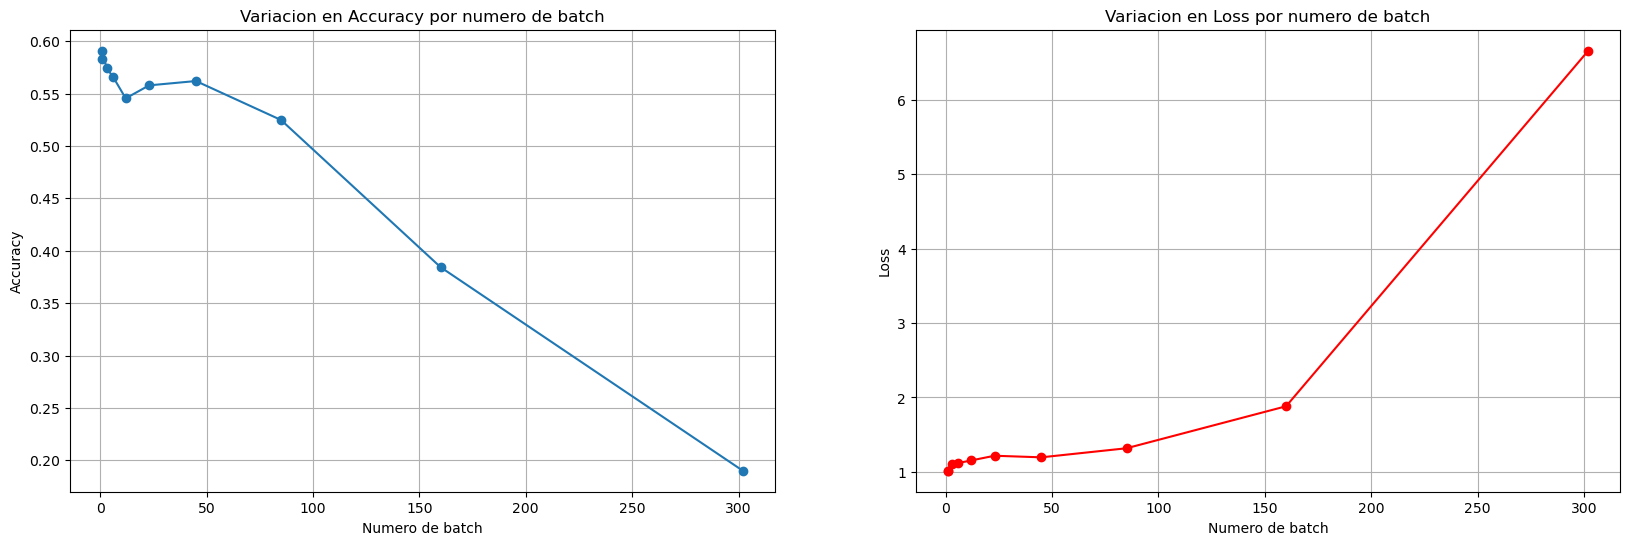

In [205]:
# Extraemos los valores para graficar
batch_values = [result[0] for result in batch_results]
batch_accuracy_values = [result[1] for result in batch_results]
batch_loss_values = [result[2] for result in batch_results]

# Graficamos

fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(batch_values, batch_accuracy_values, marker='o')
plt.xlabel('Numero de batch')
plt.ylabel('Accuracy')
plt.title('Variacion en Accuracy por numero de batch')
plt.grid(True)

# Create the loss graph
plt.subplot(1,2,2)
plt.plot(batch_values, batch_loss_values, marker='o', color='r')
plt.xlabel('Numero de batch')
plt.ylabel('Loss')
plt.title('Variacion en Loss por numero de batch')
plt.grid(True)
plt.show()

In [ ]:
### Hay una clara tendencia que al aumentar el batch disminuye el accuracy y aumenta el loss
### Tiene sentido porque un batch pequeño asegura que el modelo tomara muchas muestras de datos y un batch grande significa menos muestras unicas.